# Tutorial 4 : Data Visualizations


Data visualization is the process of creating interactive visuals to understand
trends, variations, and derive meaningful insights from the data. The main goal of data visualization is to communicate information clearly and effectively through graphical means

In this tutorial, you’ll learn:

- What the different types of pandas plots are and when to use them
- How to get an overview of your dataset with a histogram
- How to discover correlation with a scatter plot
- How to analyze different categories and their ratios

## About the data

In this tutorial, you’re going to analyze data on college majors sourced from the American Community Survey 2010–2012 Public Use Microdata Sample. It served as the basis for the Economic Guide To Picking A College Major featured on the website FiveThirtyEight.

## Importing Pacakages

In [22]:
import pandas as pd
%matplotlib inline

Note in last tutorial I used matplotlib.pyplot.The inline backend is popular for Jupyter Notebooks because it displays the plot in the notebook itself, immediately below the cell that creates the plot.

In [2]:
download_url = ("https://raw.githubusercontent.com/fivethirtyeight/data/master/college-majors/recent-grads.csv")

In [3]:
df = pd.read_csv(download_url)

In [4]:
pd.set_option("display.max.columns", None)
df.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,1849,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,556,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,558,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,1069,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,23170,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [5]:
print("Shape of data is " , df.shape)

Shape of data is  (173, 21)


Our dataset contains some columns related to the earnings of graduates in each major:
- "Median" is the median earnings of full-time, year-round workers.
- "P25th" is the 25th percentile of earnings.
- "P75th" is the 75th percentile of earnings.
- "Rank" is the major’s rank by median earnings.

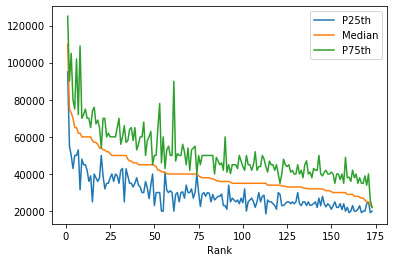

In [6]:
df.plot(x="Rank", y=["P25th", "Median", "P75th"])

.plot() returns a line graph containing data from every row in the DataFrame. The x-axis values represent the rank of each institution, and the "P25th", "Median", and "P75th" values are plotted on the y-axis.

.plot() has several optional parameters. Most notably, the kind parameter accepts eleven different string values and determines which kind of plot you’ll create:
- "area" is for area plots.
- "bar" is for vertical bar charts.
- "barh" is for horizontal bar charts.
- "box" is for box plots.
- "hexbin" is for hexbin plots.
- "hist" is for histograms.
- "kde" is for kernel density estimate charts.
- "density" is an alias for "kde".
- "line" is for line graphs.
- "pie" is for pie charts.
- "scatter" is for scatter plots. 

Looking at the plot, you can make the following observations:

- The median income decreases as rank decreases. This is expected because the rank is determined by the median income.

- Some majors have large gaps between the 25th and 75th percentiles. People with these degrees may earn significantly less or significantly more than the median income.

- Other majors have very small gaps between the 25th and 75th percentiles. People with these degrees earn salaries very close to the median income.

## Look Under the Hood: Matplotlib

When you call .plot() on a DataFrame object, Matplotlib creates the plot under the hood. 
To verify this, try out two code snippets. First, create a plot with Matplotlib using two columns of your DataFrame:

Text(0, 0.5, '75th percentile of earnings')

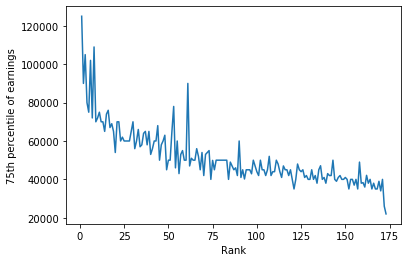

In [23]:
import matplotlib.pyplot as plt
x = df["Rank"]
y= df["P75th"]
plt.plot(x, y)
plt.xlabel("Rank")
plt.ylabel("75th percentile of earnings")

First, you import the matplotlib.pyplot module and rename it to plt. Then you call plot() and pass the DataFrame object’s "Rank" column as the first argument and the "P75th" column as the second argument. The result is a line graph that plots the 75th percentile on the y-axis against the rank on the x-axis:

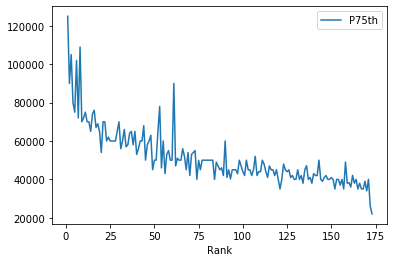

In [8]:
df.plot(x="Rank", y="P75th")

.plot() is a wrapper for pyplot.plot(), and the result is a graph identical to the one you produced with Matplotlib. You can use both pyplot.plot() and df.plot() to produce the same graph from columns of a DataFrame object. However, if you already have a DataFrame instance, then df.plot() offers cleaner syntax than pyplot.plot().

## Distributions and Histograms

Text(0.5, 0, 'Median Salary')

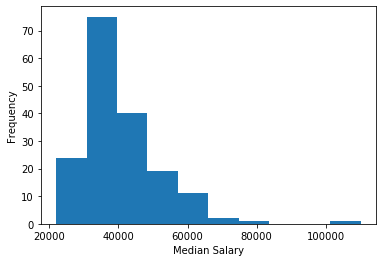

In [9]:
median_column = df["Median"]
median_column.plot(kind="hist")
plt.xlabel("Median Salary")

- The histogram shows the data grouped into ten bins ranging from  dollar 20,000,  to  dollar 120,000, and each bin has a width of $10,000. 
- The histogram has a different shape than the normal distribution, which has a symmetric bell shape with a peak in the middle.


- The histogram of the median data, however, peaks on the left below $40,000.
- The tail stretches far to the right and suggests that there are indeed fields whose majors can expect significantly higher earnings.



## Outliers

Have you spotted that lonely small bin on the right edge of the distribution? It seems that one data point has its own category. The majors in this field get an excellent salary compared not only to the average but also to the runner-up. Although this isn’t its main purpose, a histogram can help you to detect such an outlier. Let’s investigate the outlier a bit more

- Which majors does this outlier represent?
- How big is its edge?

You’ll need two steps:

- To sort by the "Median" column, use .sort_values() and provide the name of the column you want to sort by as well as the direction ascending=False.
- To get the top five items of your list, use .head().

In [10]:
#Let’s create a new DataFrame called top_5:
top_5 = df.sort_values(by="Median", ascending=False).head()

In [11]:
top_5

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,1849,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,556,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,558,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,1069,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,23170,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


Now you have a smaller DataFrame containing only the top five most lucrative majors. As a next step, you can create a bar plot that shows only the majors with these top five median salaries:



Text(0, 0.5, 'Majors')

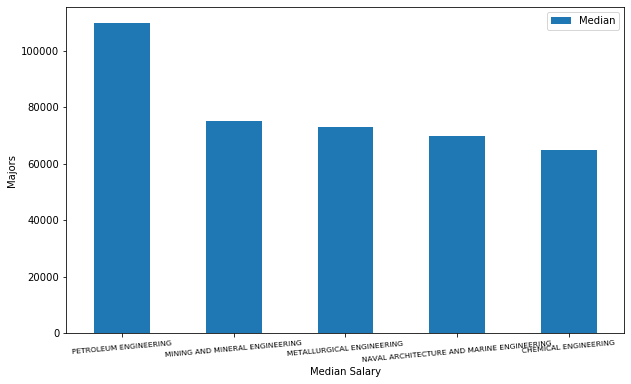

In [12]:
top_5.plot(x="Major", y="Median", kind="bar", rot=5, fontsize=4,linewidth=2,figsize=(10,6))
plt.xticks(fontsize = 7.5)
plt.yticks(fontsize = 10)
plt.xlabel("Median Salary")
plt.ylabel("Majors")

- This plot shows that the median salary of petroleum engineering majors is more than $20,000 higher than the rest. The earnings for the second- through fourth-place majors are relatively close to one another.

- Let’s investigate all majors whose median salary is above $60,000. First, you need to filter these majors with the mask df[df["Median"] > 60000]. Then you can create another bar plot showing all three earnings columns:

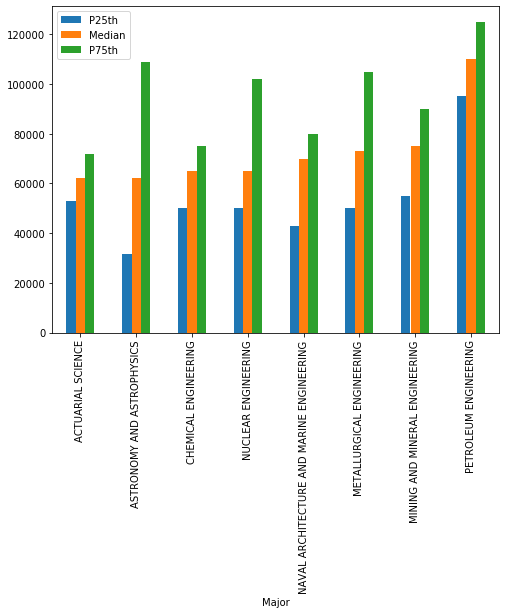

In [13]:
# filter all majors with median > $60,000
top_medians = df[df["Median"] > 60000].sort_values("Median")
# bar plot showing all three earnings columns 
top_medians.plot(x="Major", y=["P25th", "Median", "P75th"], kind="bar",figsize=(8,6))

The 25th and 75th percentile confirm what you’ve seen above: petroleum engineering majors were by far the best paid recent graduates.But question still remains about Outliers. 


## Solution : Check for Co-relation

In [19]:
df.corr()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
Rank,1.000000,0.108429,0.071137,-0.094780,0.174913,0.643781,0.008492,0.070751,0.034725,0.193174,0.020418,0.090078,0.068900,-0.873308,-0.735688,-0.802686,0.052639,0.144689,0.202920
Major_code,0.108429,1.000000,0.196784,0.179299,0.181459,0.259211,0.206580,0.200925,0.199397,0.195184,0.205634,0.223418,0.126603,-0.176072,-0.166864,-0.094556,0.041198,0.232425,0.225294
Total,0.071137,0.196784,1.000000,0.878088,0.944764,0.142999,0.945575,0.996214,0.989339,0.950268,0.981112,0.974768,0.083192,-0.106738,-0.071926,-0.083198,0.800465,0.941247,0.935510
Men,-0.094780,0.179299,0.878088,1.000000,0.672759,-0.112014,0.875176,0.870605,0.893563,0.751592,0.892454,0.869411,0.101502,0.025991,0.038725,0.052393,0.563168,0.851500,0.791336
Women,0.174913,0.181459,0.944764,0.672759,1.000000,0.297832,0.862606,0.944037,0.917681,0.954513,0.905720,0.911694,0.059108,-0.182842,-0.137738,-0.164528,0.851946,0.872132,0.904470
ShareWomen,0.643781,0.259211,0.142999,-0.112014,0.297832,1.000000,0.097496,0.147547,0.120200,0.212290,0.112523,0.121243,0.073205,-0.618690,-0.500199,-0.586932,0.195550,0.137007,0.187850
Sample_size,0.008492,0.206580,0.945575,0.875176,0.862606,0.097496,1.000000,0.964462,0.978396,0.824824,0.985235,0.918059,0.059872,-0.067578,-0.025229,-0.055737,0.701704,0.915464,0.860319
Employed,0.070751,0.200925,0.996214,0.870605,0.944037,0.147547,0.964462,1.000000,0.995838,0.934528,0.991047,0.968900,0.068056,-0.107547,-0.067514,-0.087560,0.797534,0.941326,0.927224
Full_time,0.034725,0.199397,0.989339,0.893563,0.917681,0.120200,0.978396,0.995838,1.000000,0.900877,0.998203,0.960102,0.063349,-0.082258,-0.042957,-0.065073,0.772515,0.933124,0.904852
Part_time,0.193174,0.195184,0.950268,0.751592,0.954513,0.212290,0.824824,0.934528,0.900877,1.000000,0.880855,0.945094,0.108944,-0.190124,-0.153509,-0.158220,0.804987,0.909634,0.951593


Often you want to see whether two columns of a dataset are connected. If you pick a major with higher median earnings, do you also have a lower chance of unemployment? As a first step, create a scatter plot with those two columns:

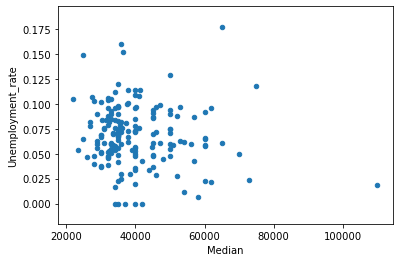

In [14]:
df.plot(x="Median", y="Unemployment_rate", kind="scatter")

While a scatter plot is an excellent tool for getting a first impression about possible correlation, it certainly isn’t definitive proof of a connection. For an overview of the correlations between different columns, you can use df.corr(). If you suspect a correlation between two values, then you have several tools at your disposal to verify your hunch and measure how strong the correlation is.

Keep in mind, though, that even if a correlation exists between two values, it still doesn’t mean that a change in one would result in a change in the other. In other words, correlation does not imply causation.

## Analyze Categorical Data

Technique 1 : Grouping:
- A basic usage of categories is grouping and aggregation. You can use .groupby() to determine how popular each of the categories in the college major dataset are:



In [15]:
cat_totals = df.groupby("Major_category")["Total"].sum().sort_values()
cat_totals

Major_category
Interdisciplinary                        12296.0
Agriculture & Natural Resources          75620.0
Law & Public Policy                     179107.0
Physical Sciences                       185479.0
Industrial Arts & Consumer Services     229792.0
Computers & Mathematics                 299008.0
Arts                                    357130.0
Communications & Journalism             392601.0
Biology & Life Science                  453862.0
Health                                  463230.0
Psychology & Social Work                481007.0
Social Science                          529966.0
Engineering                             537583.0
Education                               559129.0
Humanities & Liberal Arts               713468.0
Business                               1302376.0
Name: Total, dtype: float64

With .groupby(), you create a DataFrameGroupBy object. With .sum(), you create a Series.

Let’s draw a horizontal bar plot showing all the category totals in cat_totals:

Text(0, 0.5, 'Majors Category')

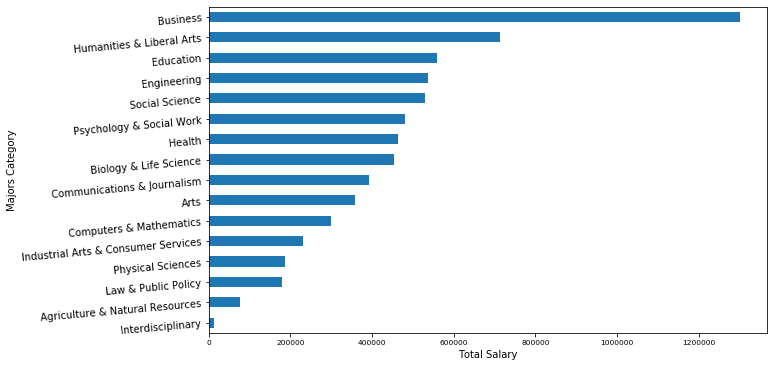

In [16]:
cat_totals.plot(kind="barh", fontsize=4,rot=5,linewidth=2,figsize=(10,6))
plt.xticks(fontsize = 7.5)
plt.yticks(fontsize = 10)
plt.xlabel("Total Salary")
plt.ylabel("Majors Category")

Technique 2 Determining Ratios

If you’re interested in ratios, then pie plots are an excellent tool. However, since cat_totals contains a few smaller categories, creating a pie plot with cat_totals.plot(kind="pie") will produce several tiny slices with overlapping labels .

To address this problem, I will only create pie chart for Categores that have salaries greater than $100,000

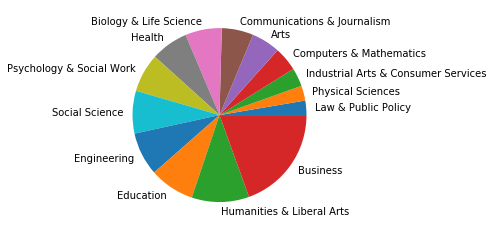

In [17]:
#categories with greater than 100,000 salaries
big_cat_totals = cat_totals[cat_totals > 100_000]

#finally create the plot
big_cat_totals.plot(kind="pie", label="")

In [18]:
big_cat_totals

Major_category
Law & Public Policy                     179107.0
Physical Sciences                       185479.0
Industrial Arts & Consumer Services     229792.0
Computers & Mathematics                 299008.0
Arts                                    357130.0
Communications & Journalism             392601.0
Biology & Life Science                  453862.0
Health                                  463230.0
Psychology & Social Work                481007.0
Social Science                          529966.0
Engineering                             537583.0
Education                               559129.0
Humanities & Liberal Arts               713468.0
Business                               1302376.0
Name: Total, dtype: float64

## END